# Lab 7.1 Introduction to Matplotlib and Line Plots

### Khám phá tập dữ liệu với *pandas* <a id="0"></a>

Tập dữ liệu: Nhập cư vào Canada từ 1980 đến 2013 <a id="2"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Khi phân tích một tập dữ liệu, bạn nên bắt đầu bằng cách lấy thông tin cơ bản về dataframe. Chúng ta có thể làm điều này bằng phương thức `info()`.

Có thể sử dụng phương thức này để có được một bản tóm tắt ngắn gọn về dataframe.

In [3]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


Để có được list các tiêu đề cột, chúng ta có thể gọi tham số .columns của dataframe.

In [4]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [5]:
# kích thước của dataframe (hàng, cột)
df_can.shape    

(195, 43)

Hãy làm sạch tập dữ liệu để loại bỏ một vài cột không cần thiết. Chúng ta có thể sử dụng phương thức pandas `drop()` như sau:

In [6]:
# trong pandas axis=0 biểu diễn hàng (mặc định) và axis=1 biểu diễn cột.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Hãy đổi tên các cột để chúng có ý nghĩa. Chúng ta có thể sử dụng phương thức `rename()` bằng cách chuyển vào dictionary các tên cũ và mới như sau:

In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Chúng ta cũng sẽ thêm cột 'Total' tính tổng số người nhập cư theo quốc gia trong toàn bộ giai đoạn 1980 - 2013, như sau:

In [9]:
df_can['Total'] = df_can.sum(axis=1)

/Users/ngothai/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [10]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Chúng ta có thể kiểm tra xem có bao nhiêu đối tượng null trong tập dữ liệu như sau:

In [11]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Cuối cùng, hãy xem tóm tắt nhanh từng cột trong dataframe bằng phương thức `describe()`.

In [12]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## *Pandas* trung cấp: Lập chỉ mục và Lựa chọn<a id="6"></a>

### Chọn cột


**Có 2 cách để lọc tên cột:**

Phương pháp 1: Nhanh chóng và dễ dàng, nhưng chỉ hoạt động nếu tên cột KHÔNG CÓ khoảng cách hoặc ký tự đặc biệt.

```python
    df.column_name 
        (returns series)
```

Phương pháp 2: Mạnh hơn và có thể lọc ở nhiều cột.

```python
    df['column']  
        (returns series)
```

```python
    df[['column 1', 'column 2']] 
        (returns dataframe)
```

In [13]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [14]:
df_can[['Country', 2000, 2001]]

,Country,2000,2001
0,Afghanistan,3326,4067
1,Albania,1816,1602
2,Algeria,2867,3418
3,American Samoa,0,0
4,Andorra,0,1
...,...,...,...
190,Viet Nam,1803,2117
191,Western Sahara,0,0
192,Yemen,122,181
193,Zambia,39,78


### Chọn hàng

Có 3 cách chính để chọn hàng:

```python
    df.loc[label]        
        #lọc theo nhãn của chỉ mục/cột
    df.iloc[index]       
        #lọc theo vị trí của chỉ mục/cột
```

Trước khi tiếp tục, hãy lưu ý rằng chỉ mục mặc định của tập dữ liệu là một dãy số từ 0 đến 194. Điều này gây khó khăn cho việc thực hiện truy vấn theo một quốc gia cụ thể. Ví dụ để tìm kiếm dữ liệu về Nhật Bản, cần biết giá trị chỉ mục tương ứng.

Điều này có thể được khắc phục dễ dàng bằng cách đặt cột 'Country' làm chỉ mục bằng phương thức `set_index()`.


In [15]:
df_can.set_index('Country', inplace=True)

In [16]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [17]:
# tùy chọn: để loại tên của index
df_can.index.name = None

In [18]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Ví dụ: Hãy xem số lượng người nhập cư từ Nhật Bản (hàng 87) trong các tình huống sau:

1\. Dữ liệu hàng đầy đủ (tất cả các cột)

2\. Trong năm 2013

3\. Trong những năm 1980 đến 1985

In [19]:
# 1. 
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [20]:
# 2.
df_can.loc['Japan', 2013]

982

In [21]:
# 3.
df_can.loc['Japan', 1980:1984]

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

Tên cột là số nguyên (chẳng hạn như năm) có thể gây ra một số nhầm lẫn. Ví dụ: khi tham khảo năm 2013, ai đó có thể nhầm lẫn với chỉ số vị trí thứ 2013.

Để tránh sự bất thường này, hãy chuyển đổi tên cột thành string: '1980' to '2013'.

In [22]:
df_can.columns = list(map(str, df_can.columns))

In [23]:
df_can.loc['Japan','2000']

1010

Do chúng ta đã chuyển đổi các năm thành string, hãy khai báo một biến để cho phép chúng ta dễ dàng gọi toàn bộ phạm vi các năm:

In [24]:
# hữu ích cho vẽ biểu đồ sau này
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Lọc theo tiêu chí

Để lọc dataframe dựa trên một điều kiện, chúng ta chỉ cần chuyển điều kiện thành một vectơ boolean.

Ví dụ: Hãy lọc dataframe để hiển thị dữ liệu về các quốc gia Châu Á (AreaName = Asia).

In [25]:
condition = df_can['Continent'] == 'Asia'
condition

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool

In [26]:
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [27]:
# chúng ta có thể truyền nhiều tiêu chí vào cùng một dòng
# hãy lọc cho AreaNAme = Asia và RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# lưu ý: Khi sử dụng toán tử 'and' và 'or', pandas yêu cầu chúng ta dùng '&' và '|' thay vì 'and' và 'or'
# đừng quên đặt 2 điều kiện trong dấu ngoặc đơn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [28]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


## Trực quan hóa dữ liệu với Matplotlib<a id="8"></a>

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
mpl.__version__

'3.5.1'

In [31]:
print(plt.style.available)
mpl.style.use(['ggplot']) # tùy chọn: style ggplot

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Biểu đồ đường (Series/Dataframe) <a id="12"></a>

**Biểu đồ đường là gì và tại sao chúng ta sử dụng nó?**

Biểu đồ đường là một loại biểu đồ hiển thị thông tin dưới dạng một chuỗi các điểm dữ liệu được gọi là 'marker' (điểm đánh dấu) được kết nối bằng các đoạn thẳng. Đây là loại biểu đồ cơ bản, phổ biến trong nhiều lĩnh vực.
Chúng ta sử dụng biểu đồ đường khi có tập dữ liệu liên tục. Đây là cách phù hợp nhất cho việc trực quan hóa dữ liệu theo xu hướng trong một khoảng thời gian.

**Hãy bắt đầu với case study sau:**

Năm 2010, Haiti phải hứng chịu thảm họa động đất mạnh 7,0 độ richter. Trận động đất này đã gây ra sự tàn phá và thiệt hại về người trên diện rộng, khoảng 3 triệu người đã bị ảnh hưởng bởi thảm họa thiên nhiên này. Chính phủ Canada đã tăng cường nỗ lực tiếp nhận người tị nạn từ Haiti. Chúng ta có thể nhanh chóng hình dung nỗ lực này bằng cách sử dụng biểu đồ `Đường`:

**Câu hỏi:** Vẽ biểu đồ đường biểu thị di cư từ Haiti, sử dụng `df.plot()`.

In [32]:
haiti = df_can.loc['Haiti',years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

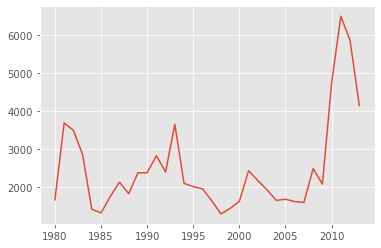

In [33]:
haiti.plot()

In [34]:
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [35]:
haiti.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

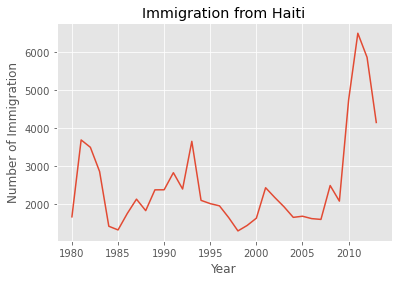

In [36]:
# Convert haiti index to int
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigration')
plt.xlabel('Year')
plt.show()

Chúng ta có thể nhận thấy rõ ràng số lượng người nhập cư từ Haiti đã tăng vọt như thế nào từ năm 2010 khi Canada tăng cường nỗ lực tiếp nhận người tị nạn từ Haiti. Hãy chú thích mức tăng đột biến này trong biểu đồ bằng phương thức `plt.text ()`.


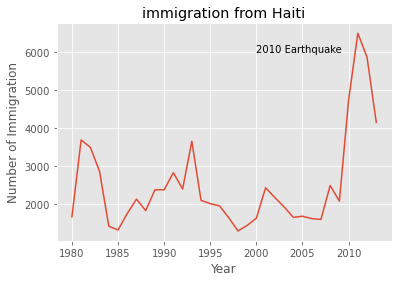

In [37]:
haiti.plot(kind = 'line')
plt.title('immigration from Haiti')
plt.ylabel('Number of Immigration')
plt.xlabel('Year')

plt.text(2000, 6000, '2010 Earthquake')
plt.show()

In [38]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [39]:
"China" in df_can.index

True

In [40]:
china = df_can.loc['China', years]
china.head()

1980    5123
1981    6682
1982    3308
1983    1863
1984    1527
Name: China, dtype: object

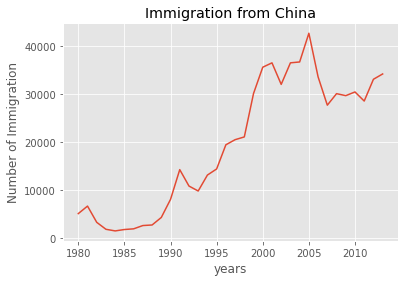

In [41]:
china.plot(kind='line')
plt.title('Immigration from China')
plt.ylabel('Number of Immigration')
plt.xlabel('years')

plt.show()

In [42]:
india = df_can.loc['India', years]
india.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

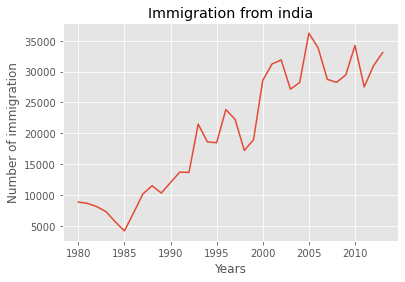

In [43]:
india.plot(kind='line')
plt.title('Immigration from india')
plt.xlabel('Years')
plt.ylabel('Number of immigration')

plt.show()

In [44]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Note: Khi vẽ biểu đồ thì matplotlib sẽ vẽ index trên trục x, các cột sẽ nằm trên các đường riêng rẽ trên trục y, do đó với `df_CI` thì cần phải chuyển vị nó.

In [45]:
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


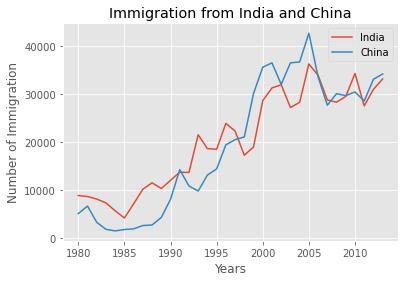

In [46]:
df_CI.plot(kind='line')
plt.title('Immigration from India and China')
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.show()

**Câu hỏi:** So sánh xu hướng của 5 quốc gia có nhiều người nhập cư vào Canada nhất.

In [47]:
# get top 5 country with largest immigration
top5 = df_can['Total'].nlargest(n=5)
top5

India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

In [48]:
df_top5 = df_can.loc[top5.index, years]
df_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [49]:
df_top5 = df_top5.transpose()
df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


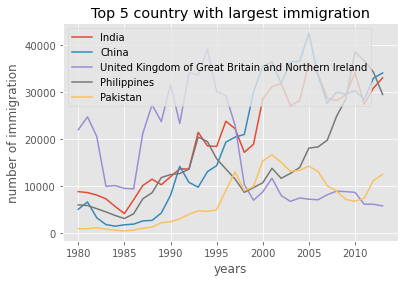

In [50]:
df_top5.plot(kind='line')
plt.title('Top 5 country with largest immigration')
plt.xlabel('years')
plt.ylabel('number of immigration')
plt.show()

### Các biểu đồ khác

Chúc mừng bạn đã học cách làm sạch dữ liệu với python và tạo biểu đồ đường bằng Matplotlib. Ngoài biểu đồ đường mặc định,còn nhiều phong cách vẽ biểu đồ khác, tất cả đều có thể được truy cập bằng cách chuyển từ khóa `kind` sang `plot()`. Danh sách đầy đủ các biểu đồ có sẵn như sau:

*   `bar` cho biểu đồ cột
*   `barh` cho biểu đồ cột ngang
*   `hist` cho biểu đồ tần suất
*   `box` cho biểu đồ hộp
*   `kde` hoặc `density` cho biểu đồ mật độ
*   `area` cho biểu đồ vùng
*   `pie` cho biểu đồ tròn
*   `scatter` cho biểu đồ phân tán
*   `hexbin` cho biểu đồ hexbin 